In [78]:
import numpy as np
import pandas as pd
import mysql.connector as sqlconn
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [79]:
myconn = sqlconn.connect(
    host = 'localhost',
    user = 'root',
    password = '',
    port = '3306',
    database = 'air_temp'
)

In [80]:
curs = myconn.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel = pd.DataFrame(result, columns=curs.column_names)
    return tabel

In [81]:
tabel = sql_table(
    '''
    select *
    from percent_50
    '''
)

tabel.head()

,id,air_temp,actual_temp
0,1,64.76,64.76
1,2,None,63.86
2,3,64.22,64.22
3,4,None,64.40
4,5,None,64.40


In [82]:
df = pd.DataFrame(tabel, columns = ("id", "air_temp", "actual_temp"))
df.head()

,id,air_temp,actual_temp
0,1,64.76,64.76
1,2,None,63.86
2,3,64.22,64.22
3,4,None,64.40
4,5,None,64.40


# Check info

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           60 non-null     int64 
 1   air_temp     30 non-null     object
 2   actual_temp  60 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


# Change air_temp and actual_temp to float64

In [84]:
# Change air_temp and actual_temp to float64
df['air_temp'] = pd.to_numeric(df['air_temp'])
df['actual_temp'] = pd.to_numeric(df['actual_temp'])

# Re-check info

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60 non-null     int64  
 1   air_temp     30 non-null     float64
 2   actual_temp  60 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.5 KB


# Check duplicated

In [86]:
df[df.duplicated()]

,id,air_temp,actual_temp


# Check null value

In [87]:
df.isnull().sum()

id              0
air_temp       30
actual_temp     0
dtype: int64

## Data Visualization & Statistics

In [88]:
x = df['id'].values.reshape(-1,1)
y = df['actual_temp'].values

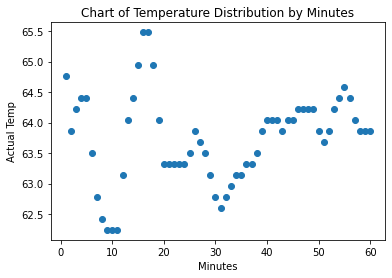

In [89]:
plt.scatter(x,y)
plt.xlabel('Minutes')
plt.ylabel('Actual Temp')
plt.title('Chart of Temperature Distribution by Minutes')
plt.show()

In [90]:
# Call the classifier
reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

print('Shape of X train : ', X_train.shape)
print('Shape of y train : ', y_train.shape)

print('Shape of X test : ', X_test.shape)
print('Shape of y test : ', y_test.shape)

Shape of X train :  (30, 1)
Shape of y train :  (30,)
Shape of X test :  (30, 1)
Shape of y test :  (30,)


In [102]:
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)
print('Y Pred: ', y_pred)

Y Pred:  [63.8475083  63.92530546 64.13276457 63.86479656 63.71784636 63.6400492
 63.91666133 64.12412044 63.96852611 63.81293178 63.65733746 63.70920223
 63.88208482 63.97717024 63.90801721 63.9944585  64.04632327 63.68326984
 63.74377875 63.89937308 64.0549674  63.87344069 63.98581437 64.08954392
 63.77835527 64.10683218 63.85615243 63.75242288 63.66598159 63.89072895]


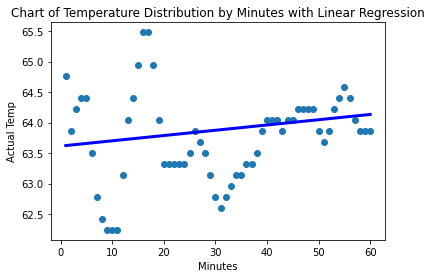

In [92]:
plt.scatter(x, y)
plt.plot(x, reg.predict(x), color='blue', linewidth=3)
plt.xlabel('Minutes')
plt.ylabel('Actual Temp')
plt.title('Chart of Temperature Distribution by Minutes with Linear Regression')
plt.show()

# Calculating MSE. The lower value, the better it is. 0 means perfect prediction

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set :', mse)

Mean squared error of testing set : 0.5839095596731803


# Calculating MAE

In [94]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set : ', mae)

Mean absolute error of testing set :  0.6087493513448171


# Calculating RSME


In [95]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set : ', rmse)

Root Mean Squared Error of testing set :  0.7641397514023075


# Plotting y_test and y_pred

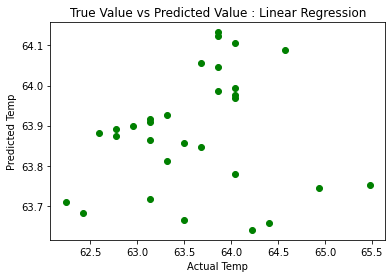

In [96]:
plt.scatter(y_test, y_pred, c = "green")
plt.xlabel('Actual Temp')
plt.ylabel('Predicted Temp')
plt.title('True Value vs Predicted Value : Linear Regression')
plt.show()

# Evaluate Model Performance

In [97]:
print('Training Accuracy :', reg.score(X_train, y_train))  
print('Testing Accuracy :', reg.score(X_test, y_test))  

Training Accuracy : 0.04924158102129084
Testing Accuracy : -0.12480651809442778


# Getting y_pred

In [98]:
# y_pred

df_y = pd.DataFrame(y_pred)

df_y

,0
0,63.847508
1,63.925305
2,64.132765
3,63.864797
4,63.717846
5,63.640049
6,63.916661
7,64.124120
8,63.968526
9,63.812932


In [99]:
new_tabel = sql_table(
    '''
    SELECT * FROM `air_temp`.`percent_50` WHERE `air_temp` IS NULL LIMIT 0,1000
    '''
)

In [100]:
df = pd.DataFrame(new_tabel, columns = ("id", "air_temp", "actual_temp"))
df.head()

,id,air_temp,actual_temp
0,2,None,63.86
1,4,None,64.40
2,5,None,64.40
3,7,None,62.78
4,10,None,62.24


In [101]:
# df['air_temp'] = df['air_temp'].fillna(df_y.value_counts)
df

,id,air_temp,actual_temp
0,2,None,63.86
1,4,None,64.40
2,5,None,64.40
3,7,None,62.78
4,10,None,62.24
5,11,None,62.24
6,13,None,64.04
7,15,None,64.94
8,17,None,65.48
9,19,None,64.04
